In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [3]:
train = pd.read_csv("germeval2018.training.txt", sep="\t", header=None)

In [4]:
#perform binary classification
train = train[[1,0]]
train.columns = ['sentiment', 'tweet_text']
train.applymap(lambda x: x.strip() if type(x) is str else x)

,sentiment,tweet_text
0,OTHER,"@corinnamilborn Liebe Corinna, wir würden dich..."
1,OTHER,@Martin28a Sie haben ja auch Recht. Unser Twee...
2,OTHER,@ahrens_theo fröhlicher gruß aus der schönsten...
3,OTHER,@dushanwegner Amis hätten alles und jeden gewä...
4,OFFENSE,@spdde kein verläßlicher Verhandlungspartner. ...
5,OTHER,"@Dirki_M Ja, aber wo widersprechen die Zahlen ..."
6,OFFENSE,@milenahanm 33 bis 45 habe ich noch gar nicht ...
7,OTHER,@jayxderxmensch @jayxthexhuman Wieso? Was find...
8,OFFENSE,@tagesschau Euere AfD Hetze wirkt. Da könnt ih...
9,OFFENSE,"Deutsche Medien, Halbwahrheiten und einseitige..."


In [5]:
mapping = {'OTHER': 0, 'OFFENSE': 1}
train = train.replace({'sentiment': mapping})
#df_clas_data['sentiment'] = df_clas_data['sentiment'].str.strip()
train['sentiment'] = train['sentiment'].astype(np.float32)

In [6]:
df

NameError: name 'df' is not defined

In [ ]:
import re

import re
import sys


def preprocess_word(word):
    # Remove punctuation
    word = word.strip('\'"?!,.():;')
    # Convert more than 2 letter repetitions to 2 letter
    # funnnnny --> funny
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word


def is_valid_word(word):
    # Check if word begins with an alphabet
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)


def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMO_POS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', tweet)
    return tweet


def preprocess_tweet(tweet):
    processed_tweet = []
    # Convert to lower case
    tweet = tweet.lower()
    # Replaces URLs with the word URL
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' URL ', tweet)
    # Replace @handle with the word USER_MENTION
    tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
    # Replaces #hashtag with hashtag
    tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    tweet = handle_emojis(tweet)
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()

    for word in words:
        word = preprocess_word(word)
        if is_valid_word(word):
            processed_tweet.append(word)

    return ' '.join(processed_tweet)

In [ ]:
train['tweet_text'] = train['tweet_text'].apply(lambda x: preprocess_tweet(x))

In [ ]:
train

In [7]:
train.to_csv("Germeval_Data_Train.csv", index=False)
train['sentiment'].value_counts()

0.0    3321
1.0    1688
Name: sentiment, dtype: int64

There are some very large comments in the dataset as well

In [8]:
lens = train.tweet_text.str.len()
lens.mean(), lens.std(), lens.max()

(142.26751846675984, 73.602099661162228, 637)

(array([ 1093.,  2387.,   725.,   418.,   293.,    42.,    24.,    20.,
            4.,     3.]),
 array([  27.,   88.,  149.,  210.,  271.,  332.,  393.,  454.,  515.,
         576.,  637.]),
 <a list of 10 Patch objects>)

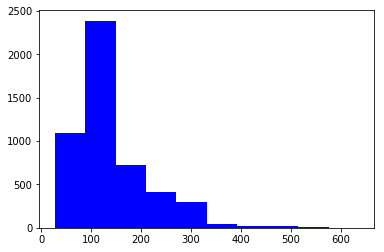

In [9]:
plt.hist(lens, 10, histtype = 'bar', facecolor = 'blue')

# Tokenizing text

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['tweet_text'])
X_train_counts.shape

(5009, 17534)

In [11]:
#access vocabulary
count_vect.vocabulary_.get('idiot')

7591

# Calculate frequencies

In [12]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf

<5009x17534 sparse matrix of type '<class 'numpy.float64'>'
	with 93788 stored elements in Compressed Sparse Row format>

# Naive Bayes-Classifier

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


test = pd.read_csv("Germeval_Data_Test.csv", sep=",")

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
text_clf.fit(train['tweet_text'], train['sentiment']) 


predicted = text_clf.predict(test['tweet_text'])
print(predicted)
print('Accuracy: ' + str(np.mean(predicted == test['sentiment'])))

#docs_new = ['Australien hat sich auch mal Feldhasen importiert und dann sehr viel Spaß damit bekommen! Islam hat hier in Europa nichts verloren ']
#print(text_clf.predict(docs_new))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.  0.
  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Accuracy: 0.63


# SVM-Classifier

In [33]:
from sklearn.linear_model import SGDClassifier

train = pd.read_csv("Germeval_Data_Train.csv", sep=",")
test = pd.read_csv("Germeval_Data_Test.csv", sep=",")

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1))),
                     ('tfidf', TfidfTransformer(use_idf=True)), # use_idf=True obtained from GridSearch
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',max_iter=5, tol=None,random_state=42,alpha=1e-5)),
])
text_clf.fit(train['tweet_text'], train['sentiment'])  

predicted = text_clf.predict(test['tweet_text'])
print('Accuracy: ' + str(np.mean(predicted == test['sentiment'])))  

Accuracy: 0.766917293233


In [29]:
len(test)

532

In [26]:
from sklearn.metrics import classification_report
print(classification_report(test.sentiment, predicted))

             precision    recall  f1-score   support

        0.0       0.81      0.98      0.88        51
        1.0       0.97      0.76      0.85        49

avg / total       0.89      0.87      0.87       100



perform grid search to optimize parameters

In [306]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2,1e-5, 1e-8),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train['tweet_text'], train['sentiment'])

In [307]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 1e-05
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [308]:
print(gs_clf.predict(['USER_MENTION sarkasmus ist die manchmal letzte sich vor diesem ganzen asyl und migrantenwahnsinn zu']))

[1.]


In [205]:
#dir(text_clf)

# Logistic Classifier

In [300]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

test = pd.read_csv("Germeval_Data_Test.csv", sep=",")



clf = make_pipeline(CountVectorizer(ngram_range=(1, 2)),
                    TfidfTransformer(use_idf=True), 
                    GridSearchCV(LogisticRegression(),
                                 param_grid={'C': [0.1, 10.]},
                                 cv=2))

clf.fit(train['tweet_text'], train['sentiment'])
predicted = clf.predict(test['tweet_text'])

print('Accuracy: ' + str(np.mean(predicted == test['sentiment'])))
print(clf.steps[2])
sorted(clf.get_params().keys())

Accuracy: 0.86
('gridsearchcv', GridSearchCV(cv=2, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={'C': [0.1, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))


['countvectorizer',
 'countvectorizer__analyzer',
 'countvectorizer__binary',
 'countvectorizer__decode_error',
 'countvectorizer__dtype',
 'countvectorizer__encoding',
 'countvectorizer__input',
 'countvectorizer__lowercase',
 'countvectorizer__max_df',
 'countvectorizer__max_features',
 'countvectorizer__min_df',
 'countvectorizer__ngram_range',
 'countvectorizer__preprocessor',
 'countvectorizer__stop_words',
 'countvectorizer__strip_accents',
 'countvectorizer__token_pattern',
 'countvectorizer__tokenizer',
 'countvectorizer__vocabulary',
 'gridsearchcv',
 'gridsearchcv__cv',
 'gridsearchcv__error_score',
 'gridsearchcv__estimator',
 'gridsearchcv__estimator__C',
 'gridsearchcv__estimator__class_weight',
 'gridsearchcv__estimator__dual',
 'gridsearchcv__estimator__fit_intercept',
 'gridsearchcv__estimator__intercept_scaling',
 'gridsearchcv__estimator__max_iter',
 'gridsearchcv__estimator__multi_class',
 'gridsearchcv__estimator__n_jobs',
 'gridsearchcv__estimator__penalty',
 'grid

In [304]:
log_model = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                     ('tfidf', TfidfTransformer(use_idf=True)), # use_idf=True obtained from GridSearch
                     ('clf', LogisticRegression(C=5.0)), 
])
log_model.fit(train['tweet_text'], train['sentiment'])

predicted = log_model.predict(test['tweet_text'])
print('Accuracy: ' + str(np.mean(predicted == test['sentiment'])))

Accuracy: 0.86


# Multinomial naive bayes

In [223]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [224]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
# this creates a sparse matrix
trn_term_doc = vec.fit_transform(train.tweet_text)
test_term_doc = vec.transform(test.tweet_text)

In [225]:
# naive bayes equation
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [226]:
x = trn_term_doc
test_x = test_term_doc

In [312]:
# fit the model
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    print(r)
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    print(x_nb)
    return m.fit(x_nb, y), r

In [313]:
preds = np.zeros(len(test))

In [314]:
m,r = get_mdl(train['sentiment'])
preds = m.predict(test_x.multiply(r))

[[ 0.22841053 -0.37149717  0.1695696  ... -0.21156808 -0.11719147
   0.80990127]]
  (0, 5869)	-0.009102559802433175
  (0, 19)	-0.010111004896791505
  (0, 3898)	-0.00910220040089596
  (0, 3672)	-0.1389595900770217
  (0, 6444)	-0.07319010922827
  (0, 1327)	0.017057017340889467
  (0, 2454)	-0.03984517470360991
  (0, 171)	0.008839703235263653
  (0, 5802)	-0.10029811885087407
  (0, 2510)	-0.11145440166957411
  (0, 1660)	0.0015186645409454066
  (0, 5870)	-0.00906664688035067
  (0, 21)	-0.00910220040089596
  (0, 4000)	-0.15277614669073794
  (1, 5869)	-0.006312372015800771
  (1, 19)	-0.0070117006366792085
  (1, 3898)	-0.006312122780832236
  (1, 6444)	-0.050755304810239946
  (1, 5870)	-0.006287467403331359
  (1, 21)	-0.006312122780832236
  (1, 5163)	-0.026995846889914934
  (1, 2624)	0.015698261675678837
  (1, 3268)	0.0035827540987471177
  (1, 354)	-0.030160967473050172
  (1, 4773)	-0.05887148778029678
  :	:
  (5007, 787)	0.2618342624334894
  (5007, 3475)	0.23343134910459715
  (5007, 4686)	0.200

In [235]:
preds

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
      dtype=float32)

In [236]:
print('Accuracy: ' + str(np.mean(preds == test['sentiment']))) 

Accuracy: 0.79


# LSA clustering

In [324]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

lsa = TruncatedSVD(50, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(trn_term_doc)

dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
print(sum(lsa.explained_variance_ratio_))

0.13956680808114474


In [325]:
pd.DataFrame(lsa.components_,columns = vec.get_feature_names())

,.,. a,. aber,. b,. das,. de,. die,. ein,. g,. ich,...,zweck,zwei,zweimal,zweite,zweiten,zweitens,zwingend,zwischen,zwischen und,zwitter
0,0.020356,0.002004,0.000289,0.002313,0.000462,0.000602,0.001171,0.000844,0.000824,4.842020e-04,...,0.000587,0.004075,0.000180,0.000437,0.001262,0.000850,0.000923,0.002816,0.001001,0.001091
1,-0.043467,-0.006114,-0.002325,-0.003994,-0.001714,-0.002161,-0.002374,-0.002279,-0.003688,-2.039752e-03,...,-0.000644,-0.005368,-0.001836,-0.003306,0.000038,-0.000863,-0.000723,-0.008436,-0.002154,0.000287
2,-0.004797,0.008380,-0.001654,-0.003271,-0.001891,-0.001037,0.001492,0.000715,-0.001041,-8.002062e-07,...,0.000178,-0.002317,-0.000303,0.002110,0.001418,-0.002226,0.001410,0.004733,0.001528,-0.001525
3,-0.007516,-0.001542,-0.000311,-0.004493,0.001919,-0.003179,-0.000895,0.000910,0.003402,3.309007e-04,...,0.000529,0.001457,0.000552,0.002855,0.001239,-0.002282,-0.000551,-0.000314,0.002593,0.001009
4,0.025398,0.006214,-0.000885,-0.000818,0.000345,0.000626,0.002691,-0.003201,-0.000279,3.437680e-03,...,-0.000102,0.009487,-0.001447,-0.001689,0.001709,-0.000445,-0.000873,-0.006161,-0.003245,0.000668
5,-0.005491,0.000595,0.000290,-0.002594,-0.000085,-0.001671,-0.000812,-0.000253,-0.001105,4.451620e-04,...,-0.000356,-0.002161,-0.001002,-0.000500,0.001508,-0.001124,-0.000081,-0.000623,-0.000511,-0.000108
6,0.007031,-0.000672,-0.000472,0.005913,-0.002242,0.004721,-0.003344,-0.002510,0.003275,1.380683e-05,...,0.000166,0.008214,-0.001081,0.002613,-0.000218,0.002732,0.000253,-0.008815,-0.004060,-0.001623
7,-0.030758,-0.003653,-0.002107,-0.004563,-0.000079,-0.001238,0.003124,0.000522,-0.001040,-1.660722e-03,...,-0.000087,-0.002084,-0.000167,0.000597,-0.002583,-0.000614,-0.000045,0.007053,0.002269,0.000577
8,-0.030776,-0.005181,0.000369,-0.003278,0.000594,-0.001374,-0.000399,-0.003884,-0.000140,3.907716e-04,...,-0.000208,0.003749,-0.004281,0.000456,-0.005434,0.002282,0.001472,0.000779,0.001983,0.000419
9,-0.008508,-0.003048,0.001197,-0.002106,-0.000837,-0.001213,0.000256,-0.000178,0.001491,-6.493221e-04,...,0.000530,-0.010172,-0.000434,-0.000904,-0.002319,-0.000422,0.001166,-0.007135,0.000448,-0.000204


In [327]:
pd.DataFrame(dtm_lsa, index = train.tweet_text)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
tweet_text,,,,,,,,,,,,,,,,,,,,,
USER_MENTION liebe corinna wir dich gerne als moderatorin uns gewinnen du begeisterbar,0.409070,0.037217,-0.079293,-0.135118,0.008263,0.102719,-0.010036,-0.300862,0.006050,-0.078683,...,0.144961,0.032628,0.050661,-0.225898,-0.123908,0.106402,-0.287965,0.010641,0.004623,0.066316
USER_MENTION sie haben ja auch recht unser tweet war etwas dass das bverfg sachleistungen nicht kritisieren wir,0.446782,-0.170582,-0.308589,-0.147694,-0.158357,0.091617,-0.081026,-0.293422,0.194556,0.232182,...,-0.052767,0.095196,-0.103257,0.026797,-0.017727,-0.203584,0.076296,0.061365,0.186855,-0.065207
USER_MENTION aus der stadt der welt theo,0.322775,-0.049525,0.428128,0.076489,0.110090,0.105624,-0.071870,-0.022368,0.119139,0.299556,...,0.031355,0.038424,-0.043116,-0.035330,-0.048544,-0.004603,-0.089103,-0.032196,-0.020694,-0.052861
USER_MENTION amis alles und jeden nur hillary wollten sie nicht und eine fortsetzung von obamapolitik erst recht nicht,0.456115,-0.207652,-0.200585,-0.057077,-0.053209,-0.100935,-0.111025,-0.094649,-0.016333,0.082827,...,-0.096450,0.031607,-0.141175,-0.123877,0.068107,0.002854,0.020057,-0.001788,-0.082005,0.124451
USER_MENTION kein verhandlungspartner nachkarteln nach den schickt diese spd in die versenkung,0.494792,-0.180549,0.196785,-0.173713,0.190537,0.084214,0.061009,0.180019,0.059900,-0.160416,...,-0.036607,0.140923,0.032921,-0.039825,0.098773,0.220626,0.271179,0.087020,-0.209391,-0.108277
USER_MENTION ja aber wo widersprechen die zahlen denn denen die im von uns verlinkten artikel stehen in unserem tweet geht es rein um subs ist der gesamte familiennachzug im vergleich zu die zahlen die hr brandner leicht gewesen,0.413412,-0.382113,0.078813,-0.122685,-0.063570,0.002271,0.156863,0.085371,-0.075800,0.087856,...,0.035120,0.220454,-0.007103,0.194840,-0.012670,0.031447,-0.117121,0.297408,0.080441,0.020096
USER_MENTION bis habe ich noch gar nicht gelebt und es geht mir am arsch vorbei was in dieser zeit geschehen ist ich lebe im heute und jetzt und nicht in der vergangenheit,0.417003,-0.396781,-0.077179,0.229206,0.227973,-0.022416,0.181396,-0.031097,0.124999,-0.061416,...,0.161934,0.059190,0.024829,0.158542,-0.050260,0.066350,0.152059,-0.140720,0.071793,0.046370
USER_MENTION USER_MENTION wieso was findest du da unklar,0.699822,0.290290,0.005133,0.055117,-0.018465,-0.042849,-0.006151,-0.087037,-0.136245,-0.082910,...,-0.024845,-0.000260,0.107704,0.166714,-0.043841,-0.036160,-0.038121,-0.038974,0.044439,-0.050873
USER_MENTION euere afd hetze wirkt da ihr stolz sein bei ardfernsehen,0.479854,0.011948,-0.009055,-0.011648,-0.000786,-0.017798,0.033309,-0.051732,-0.135914,0.017481,...,0.017496,-0.047871,-0.028152,0.169316,0.067344,0.045187,-0.122076,-0.028322,-0.057130,-0.261199


In [328]:
xs = [w[0] for w in dtm_lsa] 
ys = [w[1] for w in dtm_lsa]

xs, ys

([0.40907014332003583,
  0.4467816962753377,
  0.32277497141403505,
  0.4561148695638004,
  0.4947918393433152,
  0.41341174329076297,
  0.41700265544661935,
  0.6998218990280926,
  0.47985377657064554,
  0.12473132054425591,
  0.5922852739149306,
  0.3956905088460842,
  0.18272624253061337,
  0.2619770142889216,
  0.5113565008651991,
  0.6259035772827118,
  0.17835251181729622,
  0.4776934592550891,
  0.39979007383412946,
  0.13466665268169287,
  0.6233900799962446,
  0.5913308218780486,
  0.3756768542486937,
  0.6984866953629704,
  0.4419837044729743,
  0.11371224689292168,
  0.4874385472111017,
  0.1766528330783785,
  0.6016816500865634,
  0.4770951157821346,
  0.19329457960826246,
  0.27370558879447976,
  0.4245116646027306,
  0.6111219704962816,
  0.3811009616262241,
  0.5305841091476935,
  0.5550568677545519,
  0.5344705944606113,
  0.6765071828536439,
  0.8063295285099819,
  0.36273198258003936,
  0.7315900665692637,
  0.5656615349494986,
  0.3897024426155195,
  0.65232064185439

Populating the interactive namespace from numpy and matplotlib


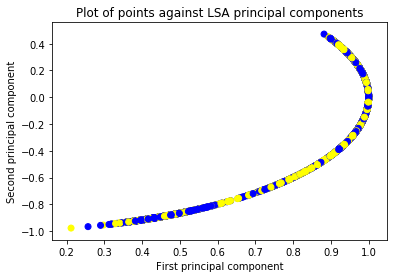

In [321]:
# Plot scatter plot of points %pylab inline
import matplotlib.pyplot as plt
%pylab inline
figure()
plt.scatter(xs,ys, color=['blue', 'yellow'])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

# Compute Similarity

In [329]:
# the matrix product contains all the dot products of the terms
similarity = np.asarray(np.asmatrix(dtm_lsa) * np.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity,index=train.tweet_text, columns=train.tweet_text).head(10)

tweet_text,USER_MENTION liebe corinna wir dich gerne als moderatorin uns gewinnen du begeisterbar,USER_MENTION sie haben ja auch recht unser tweet war etwas dass das bverfg sachleistungen nicht kritisieren wir,USER_MENTION aus der stadt der welt theo,USER_MENTION amis alles und jeden nur hillary wollten sie nicht und eine fortsetzung von obamapolitik erst recht nicht,USER_MENTION kein verhandlungspartner nachkarteln nach den schickt diese spd in die versenkung,USER_MENTION ja aber wo widersprechen die zahlen denn denen die im von uns verlinkten artikel stehen in unserem tweet geht es rein um subs ist der gesamte familiennachzug im vergleich zu die zahlen die hr brandner leicht gewesen,USER_MENTION bis habe ich noch gar nicht gelebt und es geht mir am arsch vorbei was in dieser zeit geschehen ist ich lebe im heute und jetzt und nicht in der vergangenheit,USER_MENTION USER_MENTION wieso was findest du da unklar,USER_MENTION euere afd hetze wirkt da ihr stolz sein bei ardfernsehen,deutsche medien halbwahrheiten und einseitige betrachtung wie bei allen vom staat finanzierten billigen propagandainstitutionen,...,USER_MENTION USER_MENTION unsere angie wird ausgebuht dies ist der grund warum sie auftritte meidet und nur in geschlossenen,das sturmtief frederike deutschland hinwegrauscht lese ich die zahlreichen facebookkommentare von afdsympathisanten die groening unschuldig halten den holocaust relativieren der hiesige antisemitismus auch von einem sturm weggeweht werden,wie viele sind evangelisch und wie viele sind ohne glaubensbekenntnis dann erst werden eure zahlen vergleichbar,USER_MENTION und wie reagiert die,USER_MENTION deshalb sprach ich vom wenden vorne hinten innen einen f fanuar einen den februar usw,gegens zul zu patenamt gegenseitige anerk von von synode mit mehrheit angen aksynode16,USER_MENTION zu merkel mir nur ein ein mal immer selbstverliebt und immer des eigenen vorteils bedacht,USER_MENTION USER_MENTION ein richtiges zeichen unserer nachbarn schleichende islamisierung sowie eine derartige umverteilung darf nicht werden niemals,USER_MENTION macht uns zur klagen werden nicht sind linken chaoten haben die politiker der altparteien haben ihr im trockenen und gehen in der schorfheide jagen,warum wurden die g20chaoten nicht sofort auf frischer tat verhaftet haben die polizisten nur gefilmt waren sie zu feige festnahmen
tweet_text,,,,,,,,,,,,,,,,,,,,,
USER_MENTION liebe corinna wir dich gerne als moderatorin uns gewinnen du begeisterbar,1.000000,0.226100,0.145564,0.142166,0.185034,0.149286,0.056953,0.551981,0.211170,-0.012385,...,0.184726,0.028378,-0.019122,0.219634,0.371075,0.013872,0.149206,0.215290,0.192106,0.012186
USER_MENTION sie haben ja auch recht unser tweet war etwas dass das bverfg sachleistungen nicht kritisieren wir,0.226100,1.000000,0.089339,0.427208,0.099024,0.292244,0.205764,0.227365,0.096110,-0.021710,...,0.316454,0.161168,-0.001130,0.159902,0.183986,-0.019478,0.203961,0.286481,0.324112,0.425417
USER_MENTION aus der stadt der welt theo,0.145564,0.089339,1.000000,0.101544,0.126235,0.128259,0.123581,0.199640,0.140109,-0.043972,...,0.273731,0.053841,-0.027729,0.179116,0.180687,-0.026634,0.125514,0.164704,0.246922,0.015852
USER_MENTION amis alles und jeden nur hillary wollten sie nicht und eine fortsetzung von obamapolitik erst recht nicht,0.142166,0.427208,0.101544,1.000000,0.175010,0.190333,0.361188,0.202372,0.138521,0.141243,...,0.541908,0.149405,0.145870,0.412584,0.280080,0.170624,0.305481,0.449074,0.294469,0.385713
USER_MENTION kein verhandlungspartner nachkarteln nach den schickt diese spd in die versenkung,0.185034,0.099024,0.126235,0.175010,1.000000,0.361617,0.301182,0.273502,0.191748,0.013835,...,0.382462,0.238782,-0.019211,0.344700,0.534498,-0.044670,0.175939,0.251332,0.340030,0.149210
USER_MENTION ja aber wo widersprechen die zahlen denn denen die im von uns verlinkten artikel stehen in unserem tweet geht es rein um subs ist der gesamte familiennachzug im vergleich zu die zahlen die hr brandner le